In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据
df = pd.read_csv("../CleanDeta/order_full_cleaned.csv", parse_dates=['order_purchase_timestamp'])

# 添加月份特征
df['month'] = df['order_purchase_timestamp'].dt.month

# 用于回归的特征
features = ['shipping_days', 'freight_value', 'price', 'payment_value', 'month']

# 删除缺失值
df = df.dropna(subset=features + ['delay_days'])

# 构建特征和标签
X = df[features]
y = df['delay_days']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Model Evaluation Results:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²:  {r2:.4f}")


Random Forest Regression Model Evaluation Results:
MAE: 0.33
MSE: 2.02
R²:  0.7064


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 获取特征重要性
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# 打印特征重要性
print("Importance of each characteristic in the prediction of days of delay：")
print(feature_importance)


Importance of each characteristic in the prediction of days of delay：
shipping_days    0.664938
freight_value    0.128587
payment_value    0.080247
price            0.073471
month            0.052757
dtype: float64


/var/folders/pl/2h31dnhx49s3vqnb89w_bk580000gn/T/ipykernel_5679/2195058545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


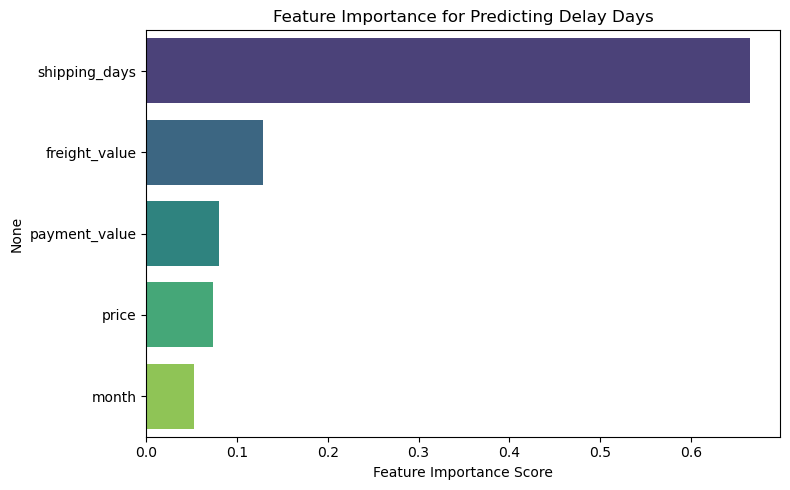

In [4]:
# 可视化
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance for Predicting Delay Days")
plt.tight_layout()
plt.show()
